In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


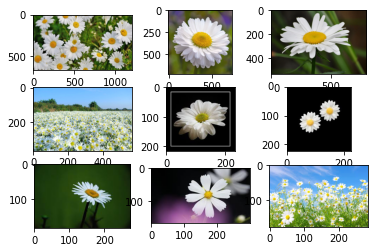

(64, 150, 150, 3) (64,)
Epoch 1/20
1/1 [==============================] - 4s 4s/step - loss: 58.3455 - accuracy: 0.0469
Epoch 2/20
1/1 [==============================] - 3s 3s/step - loss: 507.7377 - accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 3s 3s/step - loss: 375.6591 - accuracy: 0.2344
Epoch 4/20
1/1 [==============================] - 3s 3s/step - loss: 702.5077 - accuracy: 0.3594
Epoch 5/20
1/1 [==============================] - 3s 3s/step - loss: 566.7678 - accuracy: 0.1719
Epoch 6/20
1/1 [==============================] - 3s 3s/step - loss: 536.6803 - accuracy: 0.2344
Epoch 7/20
1/1 [==============================] - 3s 3s/step - loss: 298.5546 - accuracy: 0.2344
Epoch 8/20
1/1 [==============================] - 3s 3s/step - loss: 117.9891 - accuracy: 0.5625
Epoch 9/20
1/1 [==============================] - 3s 3s/step - loss: 96.4393 - accuracy: 0.3594
Epoch 10/20
1/1 [==============================] - 3s 3s/step - loss: 48.5905 - accuracy: 0.3594
Epoc

'hoacuc'

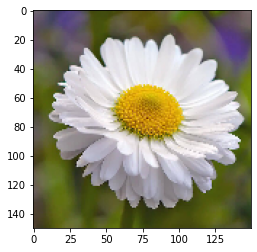

In [4]:
folder= '/content/drive/MyDrive/DATAAI/Test/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder + 'hoacuc'+ str(i) +'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
folder = '/content/drive/MyDrive/DATAAI/Test/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('hoacuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('thuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('mattroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('vantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('Flowers_photos.npy', photos)
save('Flowers_labels.npy', labels)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('Flowers.h5')
classes = ["hoacuc","thuocduoc","mattroi","vantho"]
img = load_img('/content/drive/MyDrive/DATAAI/Test/hoacuc1.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

In [13]:
from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

img = load_img('testhoacuc.jpg', target_size=(150, 150))
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('/content/Flowers.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

Giá trị dự đoán: 0
